# CNN

#### Convolutional Layer

<>:8: SyntaxWarning: invalid escape sequence '\T'
<>:8: SyntaxWarning: invalid escape sequence '\T'
C:\Users\vella\AppData\Local\Temp\ipykernel_5444\275098112.py:8: SyntaxWarning: invalid escape sequence '\T'
  img = load_img('data\Tesla.jpeg', color_mode='grayscale')


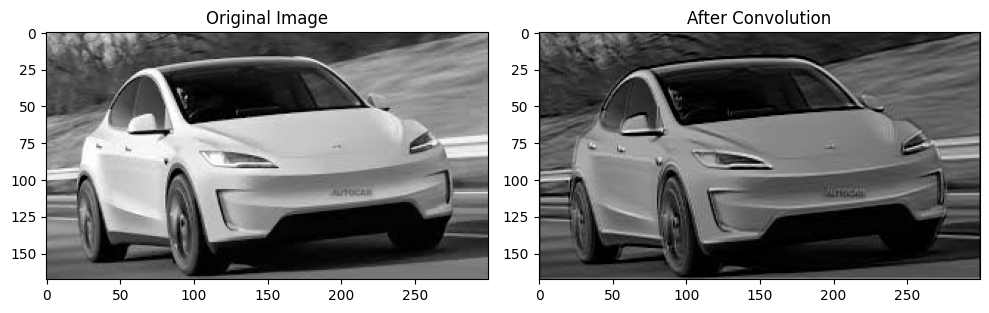

In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess an image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
img = load_img('data\Tesla.jpeg', color_mode='grayscale')
img_array = img_to_array(img) / 255.0  # Normalize pixel values
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Define a convolutional layer
conv_layer = Conv2D(filters=1, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu')

# Apply the layer
outputs = conv_layer(img_array)

# Visualize the original and convolved images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img_array[0, :, :, 0], cmap='gray')

plt.subplot(1, 2, 2)
plt.title('After Convolution')
plt.imshow(outputs[0, :, :, 0], cmap='gray')
plt.show()

### Pooling Layer

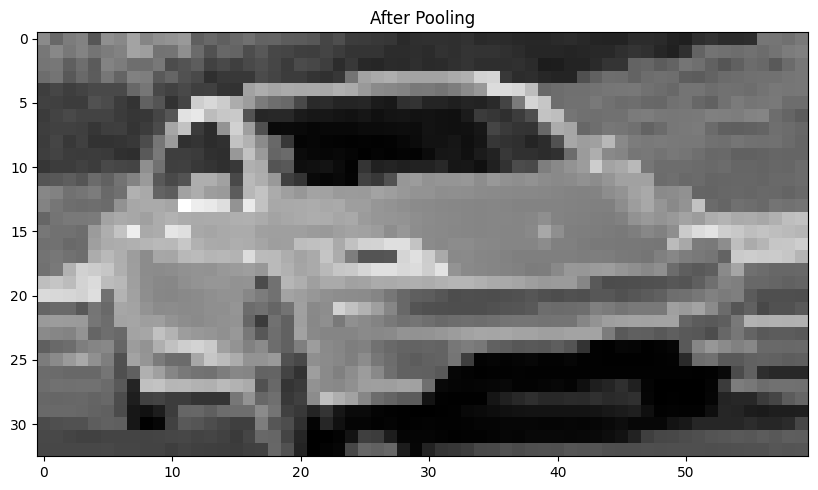

In [10]:
from tensorflow.keras.layers import MaxPooling2D

pool_layer = MaxPooling2D(pool_size=(5, 5), strides=(5, 5))
pooled_output = pool_layer(outputs)

# Visualize the pooled output
plt.figure(figsize=(10, 5))
plt.title('After Pooling')
plt.imshow(pooled_output[0, :, :, 0], cmap='gray')
plt.show()

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess an image
img = load_img('data\Tesla.jpeg', color_mode='grayscale')
img_array = img_to_array(img) / 255.0  # Normalize pixel values
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

model = Sequential([
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes for classification
])

# Make predictions
predictions = model.predict(img_array)
print(f"Predicted class probabilities: {predictions}")

<>:8: SyntaxWarning: invalid escape sequence '\T'
<>:8: SyntaxWarning: invalid escape sequence '\T'
C:\Users\vella\AppData\Local\Temp\ipykernel_5444\3898935124.py:8: SyntaxWarning: invalid escape sequence '\T'
  img = load_img('data\Tesla.jpeg', color_mode='grayscale')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 757ms/step
Predicted class probabilities: [[0.09482455 0.10277242 0.11287568 0.09846188 0.10203487 0.09685124
  0.09393776 0.09761539 0.10240796 0.09821824]]


### Transfer Learning

<>:10: SyntaxWarning: invalid escape sequence '\T'
<>:10: SyntaxWarning: invalid escape sequence '\T'
C:\Users\vella\AppData\Local\Temp\ipykernel_5444\4273204981.py:10: SyntaxWarning: invalid escape sequence '\T'
  img = load_img('data\Tesla.jpeg')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step


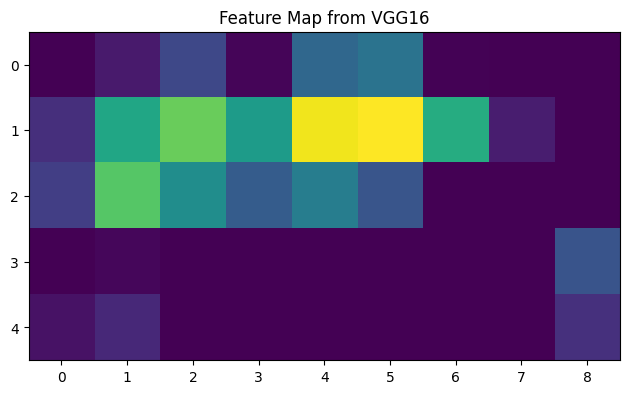

In [14]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Load pre-trained VGG16 model (excluding top layers)
base_model = VGG16(weights='imagenet', include_top=False)

# Load and preprocess an image
img = load_img('data\Tesla.jpeg')
img_array = img_to_array(img) / 255.0  # Normalize pixel values
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Extract features using the base model
features = base_model.predict(img_array)

# Visualize one of the feature maps
plt.figure()
plt.title('Feature Map from VGG16')
plt.imshow(features[0, :, :, 0], cmap='viridis')
plt.show()

### Batch Normalization

In [15]:
from tensorflow.keras.layers import BatchNormalization

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

c:\Users\vella\Desktop\Courses\AI\Code\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Data Augmentation

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Example: Applying augmentation to a single image
img = load_img('data\Tesla.jpeg')
img_array = img_to_array(img) / 255.0  # Normalize pixel values
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

augmented_data = datagen.flow(img_array, batch_size=1)
for augmented_img in augmented_data:
    print(augmented_img.shape)
    break  # Display only one augmented example

(1, 168, 300, 3)


<>:11: SyntaxWarning: invalid escape sequence '\T'
<>:11: SyntaxWarning: invalid escape sequence '\T'
C:\Users\vella\AppData\Local\Temp\ipykernel_5444\70327172.py:11: SyntaxWarning: invalid escape sequence '\T'
  img = load_img('data\Tesla.jpeg')


# RNN

Basic RNN Implementation

Using PyTorch:

In [1]:
import torch
import torch.nn as nn

class BasicRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(BasicRNN, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), self.hidden_size)
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])
        return out

# Example usage
input_size = 10
hidden_size = 20
output_size = 1

model = BasicRNN(input_size, hidden_size, output_size)
x = torch.randn(5, 7, input_size)  # Batch size: 5, Sequence length: 7
output = model(x)
print(output.shape)

torch.Size([5, 1])


# ANN

Simple ANN Implementation

Here is a basic ANN implemented using NumPy:

In [1]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Input data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Initialize weights
weights_input_hidden = np.random.rand(2, 2)
weights_hidden_output = np.random.rand(2, 1)
bias_hidden = np.random.rand(1, 2)
bias_output = np.random.rand(1, 1)

# Learning rate
lr = 0.1

# Training the network
for epoch in range(10000):
    # Forward Propagation
    hidden_layer_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    output = sigmoid(output_layer_input)

    # Backpropagation
    error = y - output
    d_output = error * sigmoid_derivative(output)

    error_hidden = d_output.dot(weights_hidden_output.T)
    d_hidden = error_hidden * sigmoid_derivative(hidden_layer_output)

    # Update weights and biases
    weights_hidden_output += hidden_layer_output.T.dot(d_output) * lr
    weights_input_hidden += X.T.dot(d_hidden) * lr
    bias_output += np.sum(d_output, axis=0, keepdims=True) * lr
    bias_hidden += np.sum(d_hidden, axis=0, keepdims=True) * lr

print("Output after training:")
print(output)

Output after training:
[[0.04962443]
 [0.49995783]
 [0.93353413]
 [0.50781757]]


Using TensorFlow/Keras

For larger, more complex models, use TensorFlow/Keras.

In [40]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential([
    Dense(4, activation='relu', input_shape=(2,)),
    Dense(2, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

model.fit(X, y, epochs=100, verbose=1)

# Evaluate
print("Final predictions:", model.predict(X))

c:\Users\vella\Desktop\Courses\AI\Code\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.7636
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.2500 - loss: 0.7629
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.2500 - loss: 0.7620
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.2500 - loss: 0.7612
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.2500 - loss: 0.7605
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.2500 - loss: 0.7597
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.2500 - loss: 0.7589
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.2500 - loss: 0.7582
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.2500 - loss: 0.7574
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.2500 - loss: 0.7567
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.2500 - loss: 0.7559
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.2500 - loss

# Introduction to Natural Language Processing (NLP)

## 1. Text Pre-processing

### 1.1 Tokenization

In [3]:
from nltk.tokenize import word_tokenize, sent_tokenize

text = "Natural Language Processing is fascinating."
print("Word Tokenization:", word_tokenize(text))
print("Sentence Tokenization:", sent_tokenize(text))

Word Tokenization: ['Natural', 'Language', 'Processing', 'is', 'fascinating', '.']
Sentence Tokenization: ['Natural Language Processing is fascinating.']


### 1.2 Lowercasing

In [4]:
text = "NLP is FUN!"
lowercase_text = text.lower()
print(lowercase_text)

nlp is fun!


### 1.3 Removing Punctuation

In [5]:
import string

text = "Hello, NLP world!"
text_no_punct = text.translate(str.maketrans('', '', string.punctuation))
print(text_no_punct)

Hello NLP world


## 2. Noise Removal

### 2.1 Removing Special Characters

In [6]:
import re

text = "Welcome to #NLP! Let's remove @special $characters."
text_cleaned = re.sub(r'[^a-zA-Z0-9\s]', '', text)
print(text_cleaned)

Welcome to NLP Lets remove special characters


### 2.2 Removing Stopwords

In [7]:
from nltk.corpus import stopwords

text = "This is a simple NLP example."
stop_words = set(stopwords.words('english'))
filtered_text = [word for word in word_tokenize(text) if word.lower() not in stop_words]
print("Filtered Text:", filtered_text)

Filtered Text: ['simple', 'NLP', 'example', '.']


## 3. Lexicon Normalization

### 3.1 Lemmatization

In [8]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
words = ["running", "runs", "ran"]
lemmatized_words = [lemmatizer.lemmatize(word, pos='v') for word in words]
print(lemmatized_words)

['run', 'run', 'run']


### 3.2 Stemming

In [9]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
words = ["running", "runs", "ran"]
stemmed_words = [stemmer.stem(word) for word in words]
print(stemmed_words)

['run', 'run', 'ran']


## 4. Object Standardization

In [10]:
import re
from dateutil import parser

# Standardizing monetary values
def standardize_money(text):
    return re.sub(r'\$([0-9]+)', r'\1 USD', text)

# Standardizing dates
def standardize_date(text):
    return parser.parse(text).strftime('%Y-%m-%d')

# Example Usage
text_money = "$100"
print("Standardized Money:", standardize_money(text_money))

text_date = "Jan 1st, 2025"
print("Standardized Date:", standardize_date(text_date))

Standardized Money: 100 USD
Standardized Date: 2025-01-01


## Combining All Steps into a Preprocessing Pipeline

In [11]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from dateutil import parser

def preprocess_text(text):
    # Lowercasing
    text = text.lower()

    # Removing punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenization
    tokens = word_tokenize(text)

    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Stemming (Optional)
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    return " ".join(tokens)

text = "Hello! This is a sample NLP text with $100 and dates like Jan 1st, 2025."
processed_text = preprocess_text(text)
print("Processed Text:", processed_text)

Processed Text: hello sampl nlp text 100 date like jan 1st 2025


# Feature Engineering

## 1. Syntactical Parsing

In [22]:
import spacy

# Load SpaCy's English model
nlp = spacy.load("en_core_web_sm")

sentence = "Yesterday The cat sat on the mat."
doc = nlp(sentence)

# Print dependency parse and POS tagging
for token in doc:
    print(f"{token.text:10} {token.dep_:15} {token.head.text:10}")

Yesterday  npadvmod        sat       
The        det             cat       
cat        nsubj           sat       
sat        ROOT            sat       
on         prep            sat       
the        det             mat       
mat        pobj            on        
.          punct           sat       


## 2. Dependency Grammar

Examples of determiners:

* Articles: "a", "an", and "the"
* Demonstratives: "this", "that", "these", and "those"
* Possessives: "my", "his", and "Dave's"
* Quantifiers: "many", "both", "most", and "all"
* Cardinal numbers: "one", "two", and "three"
* Ordinal numbers: "first", "second", and "third"

In [23]:
from spacy import displacy

# Dependency Visualization
displacy.render(doc, style="dep", jupyter=True)

## 3. Part of Speech (POS) Tagging

In [24]:
# POS tagging
for token in doc:
    print(f"{token.text:10} {token.pos_:10}")

Yesterday  NOUN      
The        DET       
cat        NOUN      
sat        VERB      
on         ADP       
the        DET       
mat        NOUN      
.          PUNCT     


## 4. Entity Parsing

In [25]:
# Entity Parsing
for ent in doc.ents:
    print(f"{ent.text:20} {ent.label_:20}")

Yesterday            DATE                


## 5. Named Entity Recognition (NER)

In [26]:
# NER visualization
displacy.render(doc, style="ent", jupyter=True)

## 6. Topic Modeling

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Sample corpus
corpus = ["Machine learning is fascinating.",
          "Natural Language Processing is a subset of AI.",
          "Deep learning is part of machine learning."]

# Vectorize corpus
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

# Apply LDA
lda = LatentDirichletAllocation(n_components=2, random_state=42)
lda.fit(X)

# Display topics
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx+1}: ", [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-6:-1]])

Topic 1:  ['of', 'is', 'processing', 'subset', 'ai']
Topic 2:  ['learning', 'machine', 'is', 'part', 'deep']


## 7. N-Grams

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1, 2))
X = vectorizer.fit_transform(["The quick brown fox jumps over the lazy dog"])
print(vectorizer.get_feature_names_out())

['brown' 'brown fox' 'dog' 'fox' 'fox jumps' 'jumps' 'jumps over' 'lazy'
 'lazy dog' 'over' 'over the' 'quick' 'quick brown' 'the' 'the lazy'
 'the quick']


## 8. TF-IDF (Term Frequency-Inverse Document Frequency)

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Apply TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(corpus)

# Display TF-IDF scores
print(tfidf_vectorizer.get_feature_names_out())
print(X.toarray())

['ai' 'deep' 'fascinating' 'is' 'language' 'learning' 'machine' 'natural'
 'of' 'part' 'processing' 'subset']
[[0.         0.         0.63174505 0.37311881 0.         0.4804584
  0.4804584  0.         0.         0.         0.         0.        ]
 [0.41074684 0.         0.         0.2425937  0.41074684 0.
  0.         0.41074684 0.31238356 0.         0.41074684 0.41074684]
 [0.         0.41454097 0.         0.24483457 0.         0.63053818
  0.31526909 0.         0.31526909 0.41454097 0.         0.        ]]


## 9. Frequency / Density Features

In [34]:
from collections import Counter

# Word frequency
word_counts = Counter("The quick brown fox jumps over the lazy dog".split())
print(word_counts)

word_counts = Counter("the quick brown fox jumps over the lazy dog".split())
print(word_counts)

Counter({'The': 1, 'quick': 1, 'brown': 1, 'fox': 1, 'jumps': 1, 'over': 1, 'the': 1, 'lazy': 1, 'dog': 1})
Counter({'the': 2, 'quick': 1, 'brown': 1, 'fox': 1, 'jumps': 1, 'over': 1, 'lazy': 1, 'dog': 1})


## 10. Word Embeddings

In [1]:
from gensim.models import Word2Vec

# Sample corpus
sentences = ["The quick brown fox", "Jumps over the lazy dog"]
corpus = [sentence.lower().split() for sentence in sentences]

# Train Word2Vec
model = Word2Vec(corpus, vector_size=50, window=2, min_count=1, workers=4)

# Get vector for a word
print(model.wv["quick"])

[ 0.00855287  0.00015212 -0.01916856 -0.01933109 -0.01229639 -0.00025714
  0.00399483  0.01886394  0.0111687  -0.00858139  0.00055663  0.00992872
  0.01539662 -0.00228845  0.00864684 -0.01162876 -0.00160838  0.0162001
 -0.00472013 -0.01932691  0.01155852 -0.00785964 -0.00244575  0.01996103
 -0.0045127  -0.00951413 -0.01065877  0.01396178 -0.01141774  0.00422733
 -0.01051132  0.01224143  0.00871461  0.00521271 -0.00298217 -0.00549213
  0.01798587  0.01043155 -0.00432504 -0.01894062 -0.0148521  -0.00212748
 -0.00158989 -0.00512582  0.01936544 -0.00091704  0.01174752 -0.01489517
 -0.00501215 -0.01109973]


# Tasks of NLP

## 1. Text Classification

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Sample data
texts = ["Buy now", "Limited offer", "Meeting at 3 PM", "Free gift", "Schedule updated"]
labels = [1, 1, 0, 1, 0]  # 1: Spam, 0: Not Spam

# Preprocessing
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=42)

# Model training
model = MultinomialNB()
model.fit(X_train, y_train)

# Prediction
predictions = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 50.00%


## 2. Text Matching

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Sample texts
text1 = "The quick brown fox jumps over the lazy dog."
text2 = "A quick brown fox leaped over a lazy dog."

# Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([text1, text2])

# Compute similarity
similarity = cosine_similarity(X[0], X[1])
print(f"Cosine Similarity: {similarity[0][0]:.2f}")

Cosine Similarity: 0.53


##  3. Levenshtein Distance

In [5]:
import numpy as np

def levenshtein_distance(a, b):
    n, m = len(a), len(b)
    dp = np.zeros((n+1, m+1))

    for i in range(n+1):
        for j in range(m+1):
            if i == 0:
                dp[i][j] = j
            elif j == 0:
                dp[i][j] = i
            else:
                cost = 0 if a[i-1] == b[j-1] else 1
                dp[i][j] = min(dp[i-1][j] + 1,    # Deletion
                               dp[i][j-1] + 1,    # Insertion
                               dp[i-1][j-1] + cost)  # Substitution
    return int(dp[n][m])

# Example
str1 = "kitten"
str2 = "sitting"
print(f"Levenshtein Distance: {levenshtein_distance(str1, str2)}")

Levenshtein Distance: 3


## 4. Phonetic Matching

In [7]:
def soundex(word):
    word = word.upper()
    soundex_map = {
        'BFPV': '1', 'CGJKQSXZ': '2', 'DT': '3',
        'L': '4', 'MN': '5', 'R': '6'
    }
    first_letter = word[0]
    
    # Replace letters with digits
    encoding = first_letter
    for char in word[1:]:
        for key in soundex_map:
            if char in key:
                digit = soundex_map[key]
                if digit != encoding[-1]:
                    encoding += digit
                break
        else:
            encoding += '0'

    return (encoding + '000')[:8]

# Example
print(soundex("Banglore"))  
print(soundex("Banglo"))  

B0524060
B0524000


In [4]:
import phonetics
from fuzzywuzzy import fuzz

code1 = phonetics.soundex("Banglore")
print(code1)
code2 = phonetics.soundex("Banglo")
print(code2)

B0524060
B05240


In [3]:
code1 = phonetics.metaphone("Banglore")
print(code1)
code2 = phonetics.metaphone("Banglo")
print(code2)

PNKLR
PNKL


## 5. Flexible String Matching

In [11]:
from fuzzywuzzy import fuzz, process

# Strings to compare
str1 = "data analysis"
str2 = "data analytics"

# Ratio similarity
similarity = fuzz.ratio(str1, str2)
print(f"Similarity: {similarity}%")

# Best match from a list
choices = ["data science", "big data analytics", "data analysis"]
match = process.extractOne("data analytic", choices)
print(f"Best Match: {match}")

Similarity: 81%
Best Match: ('data analysis', 85)
